In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import layers
from keras import models

Using TensorFlow backend.


In [28]:

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 9248)              0         
__________

In [29]:
from keras import optimizers


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adadelta(),
              metrics=['acc'])

In [30]:

from keras.preprocessing.image import ImageDataGenerator

train_dir = "./dataset2/train"
validation_dir = "./dataset2/validation"

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    # This is the target directory
    train_dir,
    # All images will be resized to 150x150
    target_size=(150, 150),

    # We read images in batches
    batch_size=20,
    
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1031 images belonging to 2 classes.
Found 516 images belonging to 2 classes.


In [31]:
# Testing that train generator works
i = 0
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    i = i + 1
    if i > 5:
        break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [25]:
# Check the last labels batch
labels_batch

array([1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 1.], dtype=float32)

In [33]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch = 18,
      verbose = 1,
      epochs = 30,
      validation_data = validation_generator,
      validation_steps = 18)

# Save the model
model.save('case_2_run_5.h5')

Epoch 1/30
18/18 [==============================] - 76s 4s/step - loss: 0.5940 - acc: 0.6917 - val_loss: 0.6036 - val_acc: 0.6910
Epoch 2/30
18/18 [==============================] - 57s 3s/step - loss: 0.5498 - acc: 0.7167 - val_loss: 0.5097 - val_acc: 0.7472
Epoch 3/30
18/18 [==============================] - 48s 3s/step - loss: 0.5458 - acc: 0.7447 - val_loss: 0.6049 - val_acc: 0.7222
Epoch 4/30
18/18 [==============================] - 46s 3s/step - loss: 0.5116 - acc: 0.7333 - val_loss: 0.5061 - val_acc: 0.7191
Epoch 5/30
18/18 [==============================] - 44s 2s/step - loss: 0.4920 - acc: 0.7444 - val_loss: 0.4624 - val_acc: 0.8062
Epoch 6/30
18/18 [==============================] - 42s 2s/step - loss: 0.5145 - acc: 0.7271 - val_loss: 0.4899 - val_acc: 0.7861
Epoch 7/30
18/18 [==============================] - 42s 2s/step - loss: 0.4945 - acc: 0.7611 - val_loss: 0.4676 - val_acc: 0.7500
Epoch 8/30
18/18 [==============================] - 42s 2s/step - loss: 0.4746 - acc: 0.75

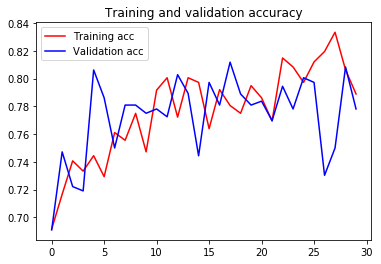

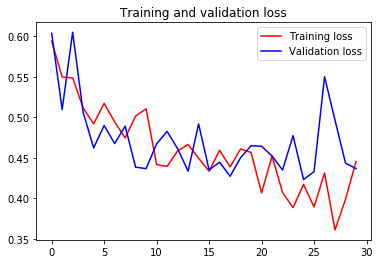

In [34]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b',c='r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b',c='r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()